In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np

# load raw_data
raw_data = pd.read_csv("data/train.csv")


# split X, y
y = raw_data["Transported"].map({True: 'True', False: 'False'})
X = raw_data.drop(columns="Transported")


# cabin column split
cabin = X["Cabin"].str.split("/", expand=True)
cabin.columns = ["deck", "deck_num", "deck_side"]


# PassengerId column split
pid = X["PassengerId"].str.split("_", expand=True)
pid.columns = ["group", "group_number"]


# PassengerId column split
X_new = pd.concat([X.drop(columns=["Cabin", "PassengerId"]), cabin, pid], axis=1)
X_new["group_number"] = X_new["group_number"].apply(lambda x: x[1])

# split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# save csv files
# X_train.to_csv('data/X_train.csv')
# y_train.to_csv('data/y_train.csv')
# X_test.to_csv('data/X_test.csv')
# y_test.to_csv('data/y_test.csv')


### object type EDA

In [2]:
# plot용 데이터셋 생성
obj_data = X_train.select_dtypes('object').drop(columns=['Name','deck_num','group'])

obj_data.head()

,HomePlanet,CryoSleep,Destination,VIP,deck,deck_side,group_number
2333,Earth,False,TRAPPIST-1e,False,NaN,NaN,1
2589,Earth,False,TRAPPIST-1e,False,F,P,2
8302,Europa,True,55 Cancri e,False,C,S,4
8177,Mars,False,TRAPPIST-1e,False,F,P,2
500,Europa,True,55 Cancri e,False,C,P,2


In [3]:
for c in obj_data.columns : 
    print(f'{c} : ',obj_data[c].unique(),' ... num of unique : ',len(obj_data[c].unique()))

HomePlanet :  ['Earth' 'Europa' 'Mars' nan]  ... num of unique :  4
CryoSleep :  [False True nan]  ... num of unique :  3
Destination :  ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]  ... num of unique :  4
VIP :  [False True nan]  ... num of unique :  3
deck :  [nan 'F' 'C' 'G' 'B' 'E' 'D' 'A' 'T']  ... num of unique :  9
deck_side :  [nan 'P' 'S']  ... num of unique :  3
group_number :  ['1' '2' '4' '3' '5' '6' '8' '7']  ... num of unique :  8


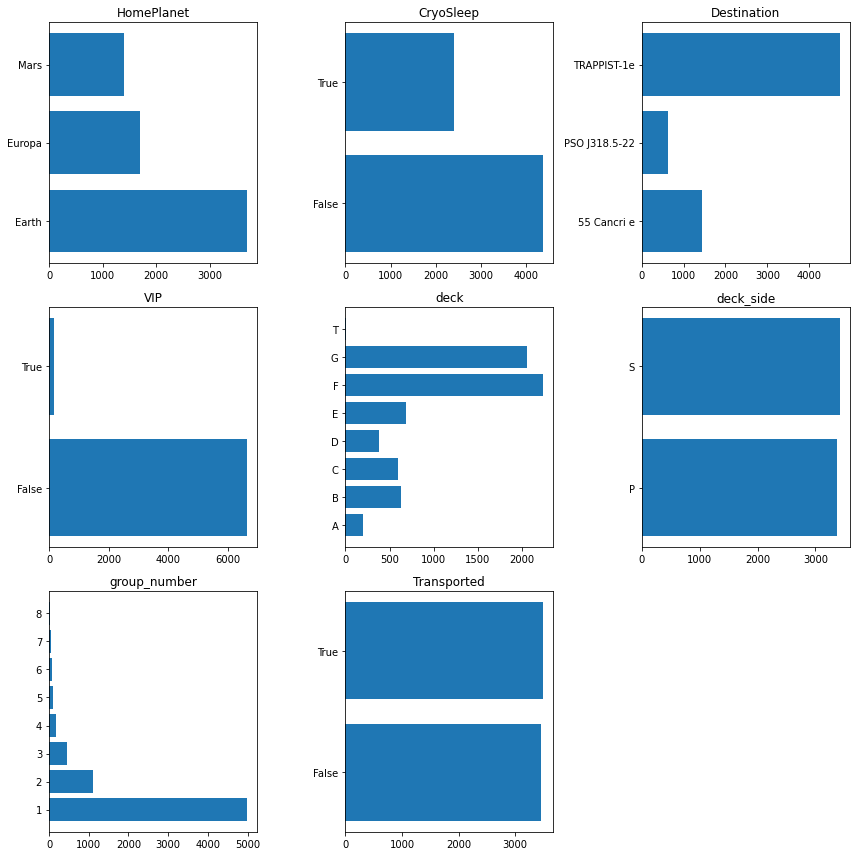

In [4]:
import matplotlib.pyplot as plt

obj_data["Transported"] = y_train

# feature 시각화
plt.figure(figsize=(12,12))
for n,c in enumerate(obj_data.columns) :
    plt.subplot(3,3,n+1)
    val_cnt = obj_data[c].value_counts().sort_index()
    plt.barh(list(map(str,val_cnt.index)),val_cnt)
    plt.title(c)
plt.tight_layout()
plt.show()

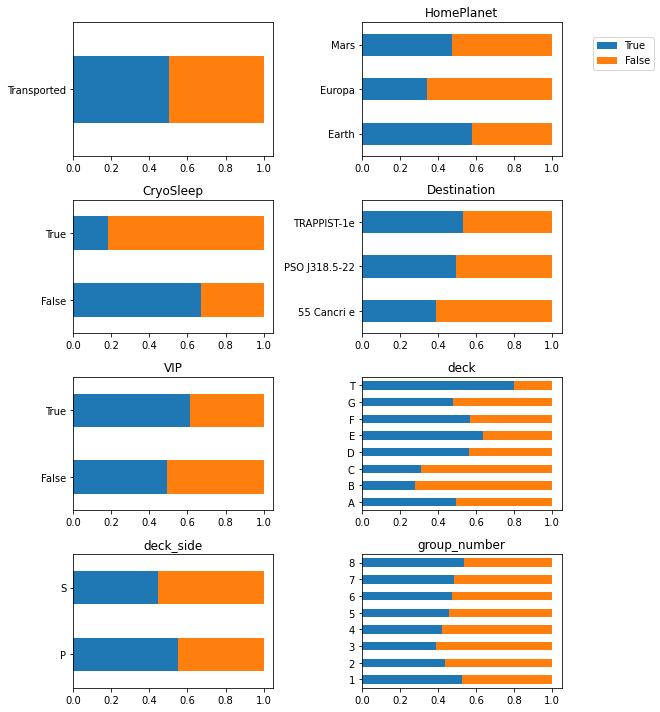

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))


for n, c_name in enumerate(obj_data.columns.drop(labels="Transported")):
    # r : row, c : column
    r, c = divmod(n + 1, 2)

    # 개별 feature와 target feature 비교
    group_df = obj_data.groupby([c_name, "Transported"]).size().unstack()

    # 개별 feature에 대해 target 별 비율 계산 및 시각화
    group_df.div(group_df.sum(axis=1), axis=0).plot(
        kind="barh", ax=axes[r, c], legend=False, stacked=True
    )
    axes[r, c].set_ylabel("")
    axes[r, c].set_title(c_name)


# Transported 비율 확인
target_data = obj_data["Transported"].value_counts()
pd.DataFrame(target_data).T.div(target_data.sum(), axis=0).plot(
    kind="barh", ax=axes[0, 0], stacked=True, legend=False
)


fig.legend(["True", "False"], bbox_to_anchor=(1.15, 0.95))
plt.tight_layout()
plt.show()


### numerical Data EDA

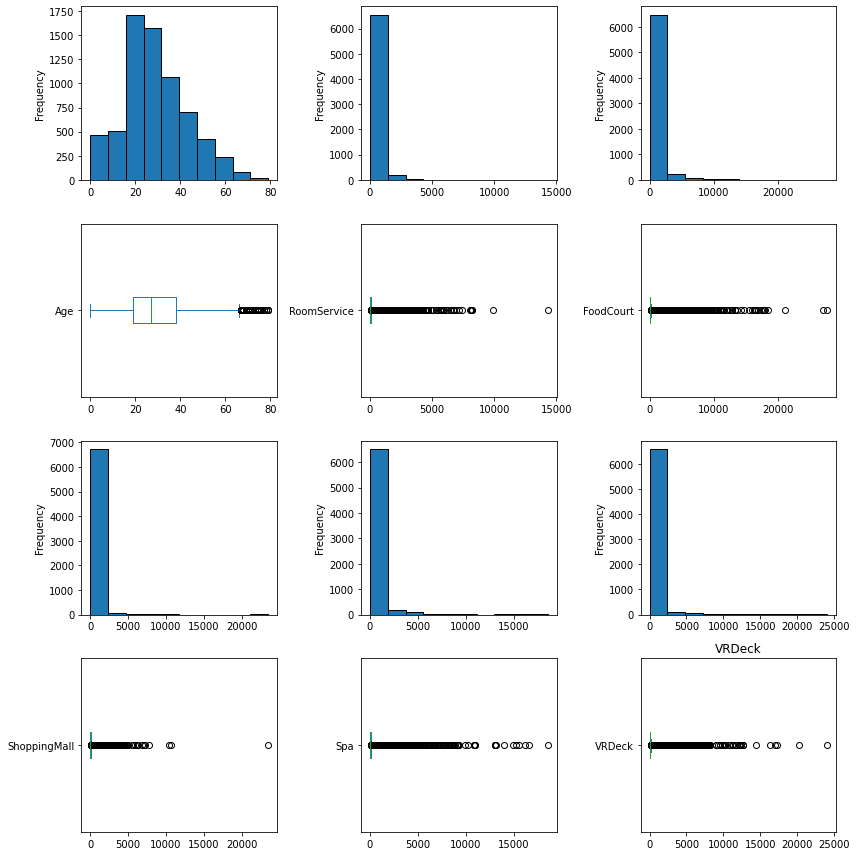

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot용 데이터셋 생성
float_data = X_train.select_dtypes('float')

float_data.head()

# feature 시각화
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
for n, c_name in enumerate(float_data):
    r, c = divmod(n, 3)
    float_data[c_name].plot(kind='hist',ax=axes[r*2,c],edgecolor='black')
    float_data[c_name].plot(kind='box',ax=axes[(r*2+1),c],vert=False)
    plt.title(c_name)
    

plt.tight_layout()
plt.show()

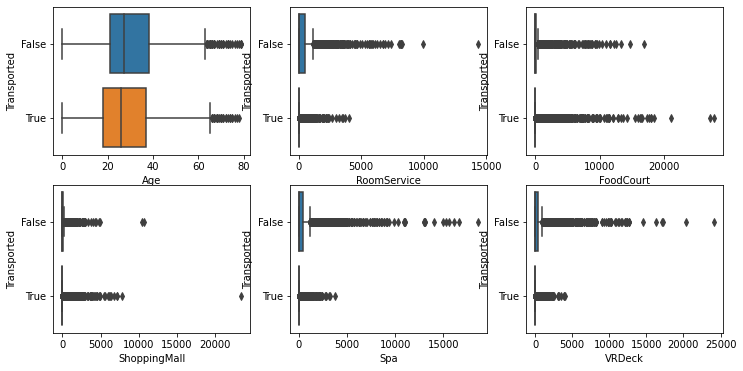

In [31]:
float_data["Transported"] = y_train
# test = float_data[['Spa','Transported']].copy()


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
for n, c_name in enumerate(float_data.drop(columns="Transported")):
    r, c = divmod(n, 3)
    # float_data[c_name][float_data[c_name] > float_data[c_name].quantile(0.80)] = float_data[c_name].quantile(0.80)
    sns.boxplot(data=float_data, x=c_name, y="Transported",ax=axes[r,c])

<AxesSubplot:xlabel='VRDeck'>

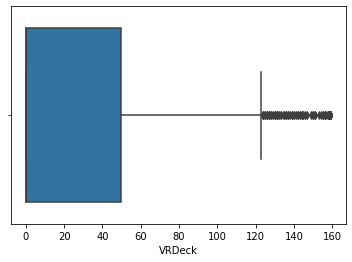

In [228]:


sns.boxplot(x=test)